<a href="https://colab.research.google.com/github/musman2012/ml-data_science/blob/master/Predicting_Student_Grades_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Bayesian Linear regression of Mathematics Students Data </center>

## Abstract
Abstract to be added later.
summarising the whole report

## Introduction
Machine Learning has become one of the widely used techniques in the world to solve problems ranging from disease diagnostics to security surveillance. This diversity of problems has motivated the researchers to devise various techniques within this area, helping the humanity in critical decision making using predictions and classifications of data points. One of such technique is Linear Regression in which relationship between inputs and outputs is formulated that can later be used for predicting unseen inputs. 

$$E(y) = \sum_{a=1}^m x_{a} b_{a} + \beta_{0}$$

One form of linear regression is Bayesian Linear Regression which makes use of statistical data analysis and Bayes theorem. The Bayesian Linear Regression can be described as follows:

$$y \sim N(β^T X,σ^2 I)$$

This describes the output as a normal distribution dependent on the mean (β) and variance (σ2). The major advantages of this approach and differences from the previous approaches are that (1) it provides the flexibility to quantify uncertainty in the estimations, (2) prior knowledge is included while finding out the posterior distributions. To illustrate, as the goal is to find posterior probability against our input, it is usually described as:

$$ Posterior=  (Likelihood ×Prior) / Evidence $$

### Dataset Explanation
For this exercise, statistical analysis and Bayes Linear Regression would be applied on the students’ grades dataset collected from the UCI data repository. Once the data is analysed and regression is applied, the implemented model would be evaluated against some other predictive models to rate it against other approaches.



## Main Results

In [0]:
## Code and docs written by Muhammad Usman (musman14@student.bradford.ac.uk)
## Importing the required libraries to be used later

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#!pip install pymc3
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn import metrics
import pymc3

### (a) Data Reading and Examing

In [5]:
import os
from google.colab import drive
drive.mount('/content/drive')   ## mounting to google drive for data access which is already placed there
os.chdir("/content/drive/My Drive/Colab Notebooks")  ## changing the current working directory

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import dill
dill.load_session('sd_cw_env.db')  ## for continuing the work where it was left previously

In [3]:
FILE_PATH = "student-mat.csv"
st_data = pd.read_csv(FILE_PATH, sep=';', error_bad_lines = False)    # reading the data from csv file with ; as sep
st_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
st_data.shape

(395, 33)

This shows the dimensions of our data, which is 395 x 33. In this data, we have 33 columns (features) and 395 rows (records).

In [5]:
print(st_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

This table shows that none of the column has any missing value. To get a better overview of what kind of values each feature has, value_counts() method was used which provided the following output:


In [6]:
for col in st_data.columns:
    print("Values Overview of", col)
    print(st_data[col].value_counts(normalize=True))

Values Overview of school
GP    0.883544
MS    0.116456
Name: school, dtype: float64
Values Overview of sex
F    0.526582
M    0.473418
Name: sex, dtype: float64
Values Overview of age
16    0.263291
17    0.248101
18    0.207595
15    0.207595
19    0.060759
20    0.007595
22    0.002532
21    0.002532
Name: age, dtype: float64
Values Overview of address
U    0.777215
R    0.222785
Name: address, dtype: float64
Values Overview of famsize
GT3    0.711392
LE3    0.288608
Name: famsize, dtype: float64
Values Overview of Pstatus
T    0.896203
A    0.103797
Name: Pstatus, dtype: float64
Values Overview of Medu
4    0.331646
2    0.260759
3    0.250633
1    0.149367
0    0.007595
Name: Medu, dtype: float64
Values Overview of Fedu
2    0.291139
3    0.253165
4    0.243038
1    0.207595
0    0.005063
Name: Fedu, dtype: float64
Values Overview of Mjob
other       0.356962
services    0.260759
at_home     0.149367
teacher     0.146835
health      0.086076
Name: Mjob, dtype: float64
Values Overv

### (b) Statistical Details of the Data

To get an overview of statistical details in all the data features, describe() method was used and the detailed results can be seen in the following cell:

In [0]:
st_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


The above box shows statistical details including Mean, Percentile, Standard Deviation (std), and Min/Max of each of the numeric feature present in our data.

### (c) Distributions of Variables  {Need to Confirm If These are Correct or Not}

#### Final Grades Against Locations

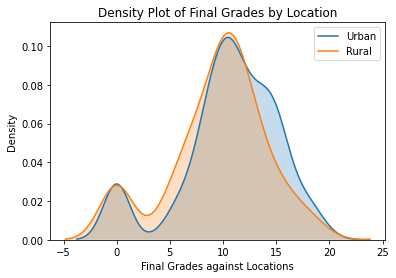

In [0]:
sns.kdeplot(st_data.loc[st_data['address'] == 'U', 'G3'], label = 'Urban', shade = True)
sns.kdeplot(st_data.loc[st_data['address'] == 'R', 'G3'], label = 'Rural', shade = True)
plt.xlabel('Final Grades against Locations'); plt.ylabel('Density'); plt.title('Density Plot of Final Grades by Location');

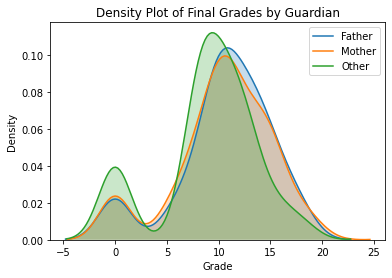

In [0]:
sns.kdeplot(st_data.loc[st_data['guardian'] == 'father', 'G3'], label = 'Father', shade = True)
sns.kdeplot(st_data.loc[st_data['guardian'] == 'mother', 'G3'], label = 'Mother', shade = True)
sns.kdeplot(st_data.loc[st_data['guardian'] == 'other', 'G3'], label = 'Other', shade = True)
plt.xlabel('Grade'); plt.ylabel('Density'); plt.title('Density Plot of Final Grades by Guardian');

#### Age

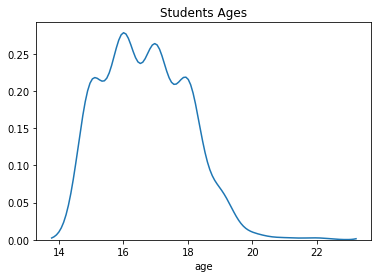

In [0]:
g = sns.distplot(st_data.age, hist=False);
g.set_title("Students Ages");

#### Absences

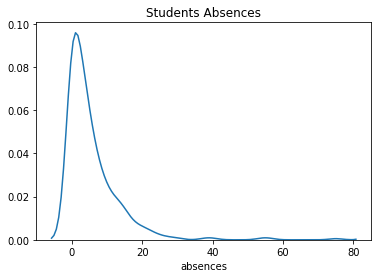

In [0]:
g = sns.distplot(st_data.absences, hist=False);
g.set_title("Students Absences");

#### Travel Time (traveltime)

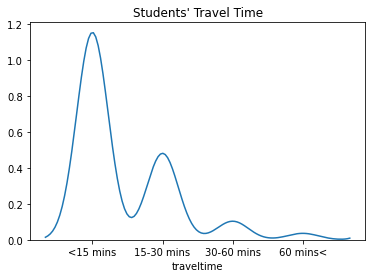

In [0]:
g = sns.distplot(st_data.traveltime, hist=False);
g.set(xticklabels=['0','<15 mins', '15-30 mins', '30-60 mins', '60 mins<']);
g.set_title("Students' Travel Time");

#### Study Time (studytime)

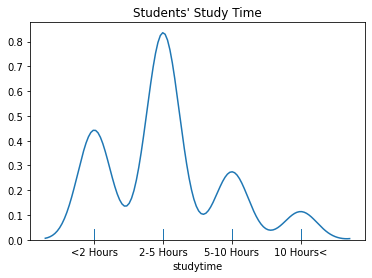

In [0]:
g = sns.distplot(st_data.studytime, hist=False, rug=True);
g.set(xticklabels=['0','<2 Hours', '2-5 Hours', '5-10 Hours', '10 Hours<']);
g.set_title("Students' Study Time");

#### Number of Class Failures (failures)

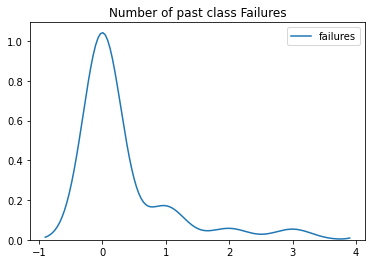

In [0]:
g = sns.kdeplot(st_data['failures'], bw=0.3);
g.set_title("Number of past class Failures");

#### Quality of family relationships (famrel)

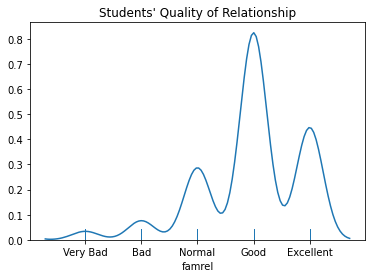

In [0]:
g = sns.distplot(st_data.famrel, hist=False, rug=True);
g.set(xticklabels=['Pass','Very Bad','Bad', 'Normal', 'Good', 'Excellent']);
g.set_title("Students' Quality of Relationship");

#### Free time after school (freetime)

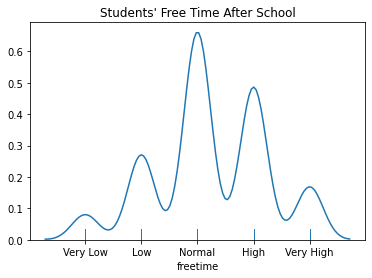

In [0]:
g = sns.distplot(st_data.freetime, hist=False, rug=True);
g.set(xticklabels=['Pass','Very Low','Low', 'Normal', 'High', 'Very High']);
g.set_title("Students' Free Time After School");

#### Going out (goout)

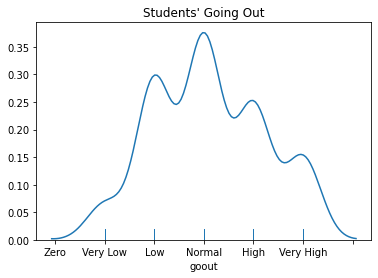

In [0]:
g = sns.distplot(st_data.goout, hist=False, rug=True);
g.set(xticklabels=['Pass','Zero','Very Low','Low', 'Normal', 'High', 'Very High']);
g.set_title("Students' Going Out");

#### Workday Alcohol Consumption

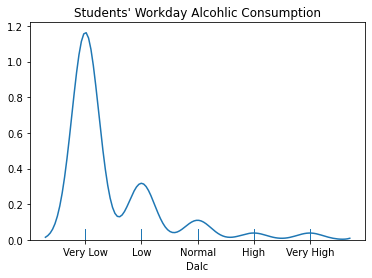

In [0]:
g = sns.distplot(st_data.Dalc, hist=False, rug=True);
g.set(xticklabels=['Pass','Very Low','Low', 'Normal', 'High', 'Very High']);
g.set_title("Students' Workday Alcohlic Consumption");

#### Weekend Alcohol Consumption

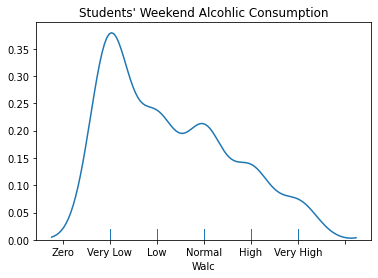

In [0]:
g = sns.distplot(st_data.Walc, hist=False, rug=True);
g.set(xticklabels=['Pass','Zero','Very Low','Low', 'Normal', 'High', 'Very High']);
g.set_title("Students' Weekend Alcohlic Consumption");

#### Student Health

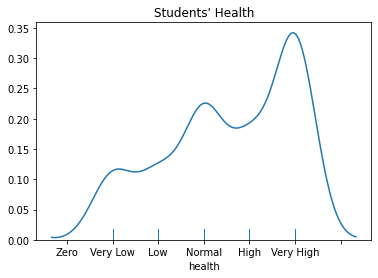

In [0]:
g = sns.distplot(st_data.health, hist=False, rug=True);
g.set(xticklabels=['Pass','Zero','Very Low','Low', 'Normal', 'High', 'Very High']);
g.set_title("Students' Health");

#### Student Grades (G1,G2,G3)

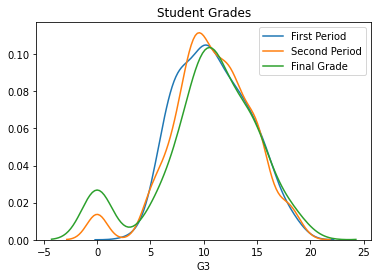

In [0]:
labels = ['First Period', 'Second Period', 'Final Grade']
for i in range(30,33):
    g = sns.distplot(st_data.iloc[:,i], hist=False, label=labels[i-30])
g.set_title("Student Grades");

### (d)  Features correlations with the Final Grade

##### Handling Categorical Variables/Features

In [0]:
#corr_data = st_data.copy()
#corr_data = corr_data.drop(columns=['G1', 'G2'])
#categorical_vars = corr_data.select_dtypes('object') # selecing all the categorical variables/features
#encoded_data = pd.get_dummies(categorical_vars) # categorical variables encoding using Pandas https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

#correlations = encoded_data.corrwith(st_data['G3'])

In [8]:
corr_data_new = st_data.copy()
corr_data_new = corr_data_new.drop(columns=['G1', 'G2']) # removing Grades G1, G3 from the data
#categorical_vars = corr_data.select_dtypes('object') # selecing all the categorical variables/features
encoded_data = pd.get_dummies(corr_data_new) # categorical variables encoding using Pandas https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
output = encoded_data['G3']   # separating the output variable from the remaining data
encoded_data.drop(columns='G3') # removing target variable from the inputs
correlations_new = encoded_data.corrwith(st_data['G3']) # calculating correlation of the complete input dataframe with Grades
correlations_new

age                 -0.161579
Medu                 0.217147
Fedu                 0.152457
traveltime          -0.117142
studytime            0.097820
failures            -0.360415
famrel               0.051363
freetime             0.011307
goout               -0.132791
Dalc                -0.054660
Walc                -0.051939
health              -0.061335
absences             0.034247
G3                   1.000000
school_GP            0.045017
school_MS           -0.045017
sex_F               -0.103456
sex_M                0.103456
address_R           -0.105756
address_U            0.105756
famsize_GT3         -0.081407
famsize_LE3          0.081407
Pstatus_A            0.058009
Pstatus_T           -0.058009
Mjob_at_home        -0.115634
Mjob_health          0.116158
Mjob_other          -0.096477
Mjob_services        0.078429
Mjob_teacher         0.057712
Fjob_at_home        -0.013385
Fjob_health          0.057111
Fjob_other          -0.053483
Fjob_services       -0.016108
Fjob_teach

In [0]:
#correlations = correlations.append(corr_data.corrwith(st_data['G3']))    # finding correlations against the final grade (G3)
#correlations
#complete_encoded_data =  pd.concat([categorical_vars, df2], axis=1)

### (e) N Most correlated variables with the final score

It can be seen from the correlation values that when categorical variables having binary values where encoded, both of the newly created features (yes,no) have the same correlation with our target variable 'G3'. So it was decided to remove one of such features from the data before finding N correlated variables.

In [0]:
## removing binary variables with duplicate correlation values
encoded_cols_to_remove = ['higher_no', 'schoolsup_no', 'school_MS', 'romantic_no', 'internet_no', 'nursery_no', 'activities_no', 'paid_no', 'famsup_no', 'sex_F']
correlations_new = correlations_new.drop(labels=encoded_cols_to_remove) # removing correlations of duplicate correlation values
encoded_data = encoded_data.drop(columns=encoded_cols_to_remove)

In [0]:
sorted_corrs_new = correlations_new.abs().sort_values(ascending = False)   # sorting the ABSOLUTE values correlations

In [12]:
# function n_corr_vals will return N features most correlated with final grade
# Need to see if we have to keep higher_no and Fedu? As the other one is already there.
def n_corr_vals(n):
    return sorted_corrs_new[1:n+1]

corr_vars = n_corr_vals(10)
corr_vars.index

Index(['failures', 'Medu', 'higher_yes', 'age', 'Fedu', 'goout',
       'romantic_yes', 'traveltime', 'Mjob_health', 'Mjob_at_home'],
      dtype='object')

## <center>  Task 2 – Bayesian Linear regression using Python </center>


## (a) Function to evaluate several statistical models 

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [0]:
### this function is a helper function for the main task in this subtask (a). It will encode the data and will split it into 75/25 ratio.
def create_test_train_data():
    global encoded_data, train_g3, test_g3
    filter_vars = []
    for iterator in corr_vars.index:  ## this will iterate through the indices of highly correlated features with the final grades
        filter_vars.append(iterator)
    # Now this filter_vars list contains only the names of those 10 features which are highly correlated with the final grade
    encoded_data = encoded_data[filter_vars] # selecting only highly correlated features
    encoded_data = pd.concat([encoded_data, output], axis=1) # adding the target variable to the dataframe
    label = encoded_data['G3']  # setting the target in data

    ## now we will split this filtered data into 75% train and 25% test portion
    X_train, X_test, y_train, y_test = train_test_split(encoded_data, label, 
                                                            test_size = 0.25,
                                                            random_state=42)
    X_train.shape
    train_g3 = pd.DataFrame(X_train['G3']) ## taking out the target variables from the test and train datasets to be used later
    test_g3 = pd.DataFrame(X_test['G3'])
    X_train = X_train.drop(columns='G3')
    X_test = X_test.drop(columns='G3')
    return X_train, X_test, y_train, y_test ## returning the data splits

In [8]:
X_train.head()

,failures,Medu,higher_yes,age,Fedu,goout,romantic_yes,traveltime,Mjob_health,Mjob_at_home,G3
16,0,4,1,16,4,3,0,1,0,0,14
66,0,4,1,15,4,3,1,1,0,0,12
211,0,4,1,17,4,5,1,1,0,0,13
7,0,4,1,17,4,4,0,2,0,0,6
19,0,4,1,16,3,3,0,1,1,0,10


In [0]:
#X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=0)

def ret_mae_rmse(pred_y, y_test):
    mae = np.mean(abs(pred_y - y_test))    # calculating MAE
    rmse = np.sqrt(np.mean((pred_y - y_test) ** 2))
    return mae, rmse

def evaluate_model(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)
    model_mae, model_rmse = ret_mae_rmse(pred_y, y_test)
    return [model_mae, model_rmse]


The following function is the one which is being demanded in part a of the project.

In [0]:
X_train, X_test, y_train, y_test = create_test_train_data()

## this function will iterate through multiple statisitcal models by training the model on training dataset and testing it on the unseen data (a)
def iterate_models():
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted']
    
    # Instantiate the models
    #X_train, X_test, y_train, y_test = create_test_train_data()
    
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    
    model_results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    for i, model_name in enumerate([model1,model2,model3,model4,model5,model6]):
        model_results.loc[model_name_list[i], :] = evaluate_model(model_name, X_train, y_train, X_test)
    
    return model_results


### (b) Implementing Bayes Linear Regression

In [11]:
blr_formula = 'G3 ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[1:]])
blr_formula ## formula to be used for Bayes Linear Regression


'G3 ~ Medu + higher_yes + age + Fedu + goout + romantic_yes + traveltime + Mjob_health + Mjob_at_home'

In [0]:
X_train =  pd.concat([X_train, train_g3], axis=1) ## adding the target variables back to test and train datasets
X_test = pd.concat([X_test, test_g3], axis=1)

In [13]:
with pymc3.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    global X_train, normal_trace
    family = pymc3.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pymc3.GLM.from_formula(blr_formula, data = X_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    normal_trace = pymc3.sample(draws=2000, chains = 2, tune = 500, cores=-1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Sequential sampling (2 chains in 1 job)
NUTS: [sd, Mjob_at_home, Mjob_health, traveltime, romantic_yes, goout, Fedu, age, higher_yes, Medu, Intercept]
100%|██████████| 2500/2500 [00:36<00:00, 68.08it/s]


To run this code efficiently, GPU were used in Google Colab and which helped to complete the code execution in almost one minute. Whereas, in the local machine, the esimated time of completion was more than an hour.
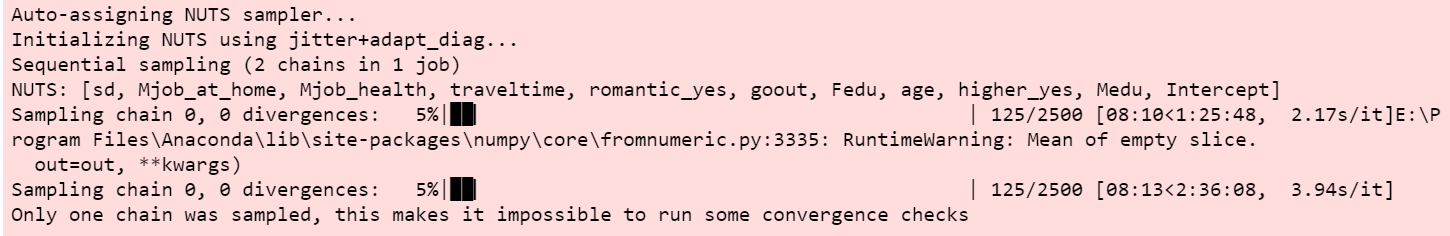

In [14]:
for variable in normal_trace.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable, 
                                                                np.mean(normal_trace[variable])))

Variable: Intercept       Mean weight in model: 12.4073
Variable: Medu            Mean weight in model: 0.7352
Variable: higher_yes      Mean weight in model: 3.2154
Variable: age             Mean weight in model: -0.2345
Variable: Fedu            Mean weight in model: -0.3623
Variable: goout           Mean weight in model: -0.5395
Variable: romantic_yes    Mean weight in model: -0.8533
Variable: traveltime      Mean weight in model: -0.1888
Variable: Mjob_health     Mean weight in model: 1.0245
Variable: Mjob_at_home    Mean weight in model: -0.2852
Variable: sd_log__        Mean weight in model: 1.4633
Variable: sd              Mean weight in model: 4.3242


In [0]:
X_train = X_train.drop(columns='G3')
X_test = X_test.drop(columns='G3')

## (c)  Examining Bayesian Linear Regression Results

In [0]:
def evaluate_trace(trace):
    global X_test, y_test, X_train, y_train
    # Dictionary of all sampled values for each parameter
    
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
        
    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Means for all the weights
    var_means = var_weights.mean(axis=0)
    
    # Create an intercept column
    X_test['Intercept'] = 1
    
    # Align names of the test observations and means
    names = X_test.columns[1:]
    X_test = X_test.loc[:, names]
    var_means = var_means[names]
    
    # Calculate estimate for each test observation using the average weights
    pred_results = pd.DataFrame(index = X_test.index, columns = ['estimate'])
    print("Dot product not done")
    for row in X_test.iterrows():
        pred_results.loc[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))
    print("Dot Product Done")    
    # Metrics 
    actual = np.array(y_test)
    errors = pred_results['estimate'] - actual
    mae = np.mean(abs(errors))
    print("Mean is", mae)
    rmse = np.sqrt(np.mean(errors ** 2))
    
    print('Model  MAE: {:.4f}\nModel RMSE: {:.4f}'.format(mae, rmse))
    print(results)
    # Add the results to the comparison dataframe
    results.loc['Bayesian LR', :] = [mae, rmse]
    
    plt.figure(figsize=(12, 8))
    
    # Plot median absolute percentage error of all models
    ax = plt.subplot(1, 2, 1)
    results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'r', ax = ax)
    plt.title('Model Mean Absolute Error Comparison'); plt.ylabel('MAE'); 
    plt.tight_layout()
    
    # Plot root mean squared error of all models
    ax = plt.subplot(1, 2, 2)
    results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'b', ax = ax)
    plt.title('Model RMSE Comparison'); plt.ylabel('RMSE')
    
    return results

Dot product not done
Dot Product Done
Mean is 3.679044936945132
Model  MAE: 3.6790
Model RMSE: 4.5900
                           mae     rmse
Linear Regression      3.51317  4.43686
ElasticNet Regression  3.61061  4.57647
Random Forest           3.7262  4.67242
Extra Trees            3.99354  5.07734
SVM                    3.53934  4.52918
Gradient Boosted       3.47333  4.33412
Bayesian LR                NaN      NaN


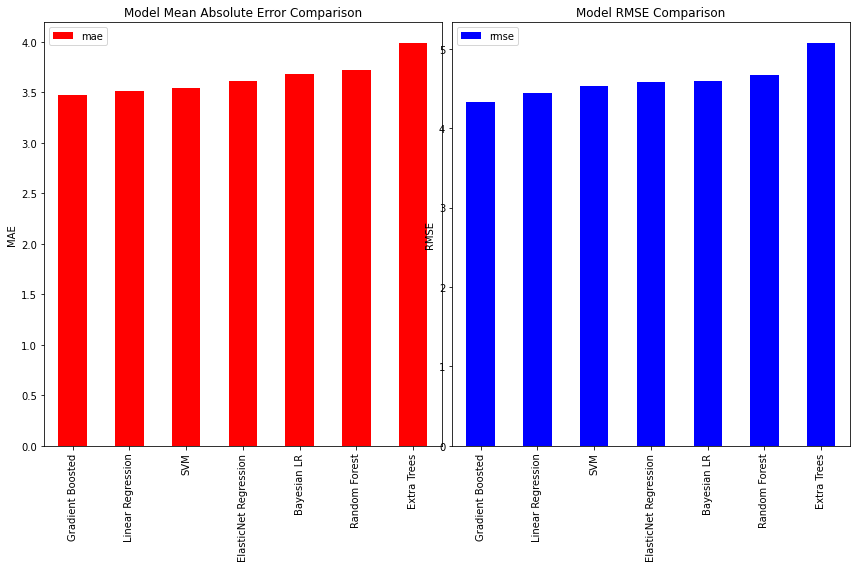

In [17]:
global normal_trace
all_model_results = evaluate_trace(normal_trace)

It can be seen in the above figure that, both in terms of Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE), Bayes Linear Regression performs better than Random Forest and Extra Trees algorithms.

## (e)  Predictions from Model on unseen (test) dataset

In [0]:
## this function will make predictions using the trained bayes linear regression model
# flag would be 0 when the function is being called with dummy data values created on the fly and would be 1 if one of the testing data record value is being predicted
# chosen_test_index will hold index of testing data record when flag is 1, and will hold the dummy data itself when flag is 0

def make_predictions(chosen_test_index, flag):
    # Print out the test observation data
    if flag:  # flag is 1, one of the testing dataset record is sent for prediction
      chosen_test = X_test.iloc[chosen_test_index]
    else:   # flag is set as 0, dummy dataset is sent
      chosen_test = chosen_test_index
    print('Test Observation:')
    print(chosen_test)
    variable_dict = {}
    for variable in normal_trace.varnames:
        variable_dict[variable] = normal_trace[variable]

    # Results into a dataframe
    variable_weights = pd.DataFrame(variable_dict)
    
    # Standard deviation of the likelihood
    sd_value = variable_weights['sd'].mean()

    if flag:  # value against the test record index
      actual = y_test.iloc[chosen_test_index]
      #chosen_test = chosen_test.drop('G3')
    
    # Add in intercept term
    chosen_test['Intercept'] = 1
    
    # Align weights and test observation
    variable_weights = variable_weights[chosen_test.index]

    # Means for all the weights
    variable_means = variable_weights.mean(axis=0)

    # Observation mean 
    observation_mean = np.dot(variable_means, chosen_test)
    
    # Grade Estimate
    estimated_values = np.random.normal(loc = observation_mean, scale = sd_value,
                                 size = 10000)

    
    plt.figure(figsize=(7, 7))
    sns.distplot(estimated_values, hist = True, kde = True, bins = 19,
                 hist_kws = {'edgecolor': 'k', 'color': 'green'},
                kde_kws = {'linewidth' : 3},
                label = 'Estimated Dist.')
    # Plot the actual grade
    if flag:
      plt.vlines(x = actual, ymin = 0, ymax = 0.11, 
               linestyles = '--', colors = 'red',
               label = 'True Grade',
              linewidth = 2.5)
    
    # Plot the mean estimate
    plt.vlines(x = mean_loc, ymin = 0, ymax = 0.11, 
               linestyles = '-', colors = 'orange',
               label = 'Mean Estimate',
              linewidth = 2.5)
    
    plt.legend(loc = 1)
    plt.title('Density Plot for Predictions on Test Data');
    plt.xlabel('Grade'); plt.ylabel('Density');
    
    # Prediction information
    if flag:
      print('True Grade = %d' % actual)
    print('Average Estimate = %0.4f' % mean_loc)
    print('5%% Estimate = %0.4f    95%% Estimate = %0.4f' % (np.percentile(estimates, 5),
                                       np.percentile(estimates, 95)))

Test Observation:
Medu             2
higher_yes       1
age             16
Fedu             2
goout            3
romantic_yes     0
traveltime       2
Mjob_health      0
Mjob_at_home     0
Intercept        1
Name: 141, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


NameError: ignored

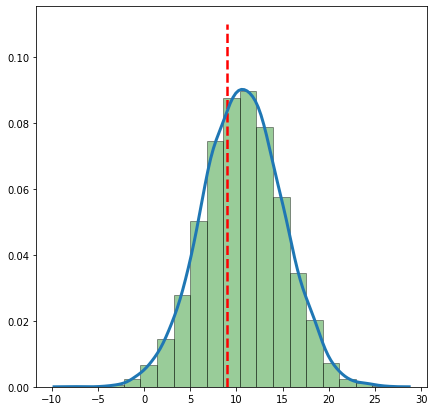

In [48]:
make_predictions(43, 1) ## giving 43rd record as an argument to the predictive function

Test Observation:
Intercept        1
age             18
goout            2
romantic_yes     0
higher_yes       1
traveltime       2
Mjob_health      0
Fedu             4
Mjob_at_home     1
dtype: int64


NameError: ignored

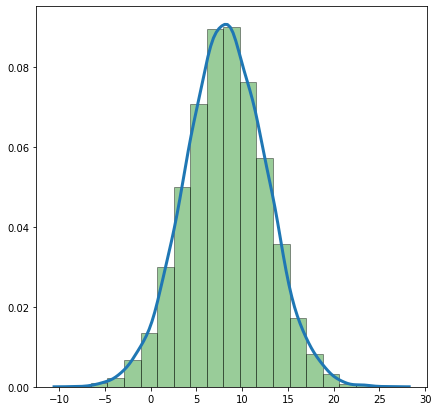

In [49]:
unseen_observation = pd.Series({'Intercept': 1, 'age': 18, 'goout': 2, 'romantic_yes': 0, 
                            'higher_yes': 1, 'traveltime': 2, 'Mjob_health' : 0, 'Fedu': 4, 'Mjob_at_home': 1})
make_predictions(unseen_observation, 0)

In [0]:
dill.dump_session('/content/drive/My Drive/Colab Notebooks/sd_cw_env.db')

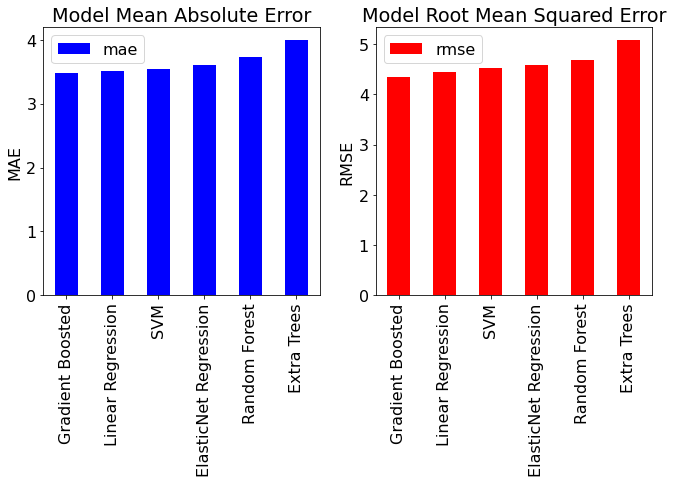

In [0]:
#model = LinearRegression()
#results = pd.DataFrame(model_results)
#figsize(12, 8)
plt.figure(figsize=(10, 7))
results = iterate_models()
#print(results)
plt.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

In [28]:
bayes_reg_formula = 'G3 = '
for variable in normal_trace.varnames:
    bayes_reg_formula += ' %0.2f * %s +' % (np.mean(normal_trace[variable]), variable)

' '.join(bayes_reg_formula.split(' ')[:-1])

'G3 =  0.00 * Intercept + -0.00 * Medu + 0.00 * higher_yes + -0.00 * age + 0.00 * Fedu + -0.00 * goout + 0.00 * romantic_yes + 0.00 * traveltime + 0.00 * Mjob_health + 0.00 * Mjob_at_home + 1.00 * G3 + -19.94 * sd_log__ + 0.00 * sd'